# Plot overall coastlines

In [2]:
import geopandas as gpd
import numpy as np
from shapely import box
import os

In [3]:
# coastlines version, v0.4.0(-2022) or v0.4.2 (-2023)
version = 'v0.4.2'

In [4]:
# load coastlines rate of change and filter to keep only good observations

hotspots = gpd.read_file(f"../data/deafricacoastlines_{version}.gpkg", layer="hotspots_zoom_1")

In [7]:
hotspots.head()

,uid,dist_2000,dist_2001,dist_2002,dist_2003,dist_2004,dist_2005,dist_2006,dist_2007,dist_2008,...,dist_2022,dist_2023,rate_time,sig_time,se_time,outl_time,radius_m,certainty,n,geometry
0,sv0eefepdcr,1.30,0.48,0.55,0.00,0.51,0.82,0.64,-0.80,-0.06,...,1.46,0.0,-0.016,0.590,0.029,,15000,good,914,POINT (3340564.209 3519970.016)
1,sv0egy4fn71,0.98,0.32,0.32,-0.20,0.06,0.76,0.24,-1.56,-0.37,...,1.62,0.0,0.003,0.931,0.033,,15000,good,866,POINT (3340544.801 3526950.217)
2,sv0shrudwmu,0.93,0.29,0.00,-0.40,-0.35,0.66,0.08,-1.83,-0.52,...,1.51,0.0,0.015,0.657,0.033,,15000,good,938,POINT (3342897.093 3532965.084)
3,sv0eec60ynb,1.36,0.48,0.58,-0.02,0.48,0.76,0.67,-0.72,-0.06,...,1.38,0.0,-0.018,0.538,0.029,,15000,good,923,POINT (3340444.264 3519072.929)
4,sv0dfvst3q7,1.48,0.13,-0.06,-0.52,0.08,0.26,0.68,-0.44,-0.46,...,1.42,0.0,-0.013,0.639,0.027,,15000,good,910,POINT (3336516.128 3506981.046)


In [9]:
styles = gpd.read_file('styles.csv')

In [92]:
import xml.etree.ElementTree as ET
import pandas as pd

# Assuming `qml_string` contains your QML XML content
qml_string = styles.loc[styles['f_table_name'] == 'hotspots_zoom_1']['styleQML'][0]

# Parse QML string
root = ET.fromstring(qml_string)

# Parse ranges and match to symbols
ranges = []
for r in root.findall(".//range"):
    symbol_id = r.attrib['symbol']
    label = r.attrib['label']
    lower = float(r.attrib['lower'])
    upper = float(r.attrib['upper'])
    ranges.append({
        "symbol": symbol_id,
        "label": label,
        "lower": lower,
        "upper": upper
    })

# Get symbol colors
symbol_colors = {}
for symbol in root.findall(".//symbol"):
    symbol_name = symbol.attrib.get("name")
    for prop in symbol.findall(".//prop"):
        if prop.attrib.get("k") == "color":
            rgba = tuple(map(int, prop.attrib.get("v").split(",")))
            # Convert to hex for matplotlib (ignore alpha)
            hex_color = "#{:02x}{:02x}{:02x}".format(*rgba[:3])
            symbol_colors[symbol_name] = hex_color

# Combine both into a DataFrame for easy plotting
df_styles = pd.DataFrame(ranges)
df_styles["color"] = df_styles["symbol"].map(symbol_colors)

# Preview
print(df_styles)

   symbol                                   label   lower   upper    color
0       0       < -5.0 m / year coastline retreat -200.00   -5.00  #ff9e17
1       1                   -5.0 to -3.0 m / year   -5.00   -3.00  #da3c43
2       2                   -3.0 to -1.0 m / year   -3.00   -1.00  #e97867
3       3                   -1.0 to -0.5 m / year   -1.00   -0.50  #f5ad8d
4       4                   -0.5 to -0.3 m / year   -0.50   -0.30  #f6cbb7
5       5                    -0.3 to 0.0 m / year   -0.30   -0.01  #f7e8e2
6       6  No significant change or low certainty   -0.01    0.01  #ffffff
7       7                     0.0 to 0.3 m / year    0.01    0.30  #e5eef3
8       8                     0.3 to 0.5 m / year    0.30    0.50  #c0dcea
9       9                     0.5 to 1.0 m / year    0.50    1.00  #9bcae1
10     10                     1.0 to 3.0 m / year    1.00    3.00  #6baed2
11     11                     3.0 to 5.0 m / year    3.00    5.00  #3890c1
12     12         > 5.0 m

In [97]:
df_styles['mean'] = np.abs(df_styles['lower'] + df_styles['upper']) / 2
df_styles_sorted = df_styles.sort_values(by='mean')
df_styles_sorted = df_styles_sorted[1:].reset_index()
df_styles_sorted

,index,symbol,label,lower,upper,color,mean
0,5,5,-0.3 to 0.0 m / year,-0.30,-0.01,#f7e8e2,0.155
1,7,7,0.0 to 0.3 m / year,0.01,0.30,#e5eef3,0.155
2,4,4,-0.5 to -0.3 m / year,-0.50,-0.30,#f6cbb7,0.400
3,8,8,0.3 to 0.5 m / year,0.30,0.50,#c0dcea,0.400
4,3,3,-1.0 to -0.5 m / year,-1.00,-0.50,#f5ad8d,0.750
5,9,9,0.5 to 1.0 m / year,0.50,1.00,#9bcae1,0.750
6,2,2,-3.0 to -1.0 m / year,-3.00,-1.00,#e97867,2.000
7,10,10,1.0 to 3.0 m / year,1.00,3.00,#6baed2,2.000
8,1,1,-5.0 to -3.0 m / year,-5.00,-3.00,#da3c43,4.000
9,11,11,3.0 to 5.0 m / year,3.00,5.00,#3890c1,4.000


In [56]:
gdf = hotspots[(hotspots['sig_time'] <= 0.01) & (hotspots['certainty'] == 'good')]

In [109]:
countries_summary = gpd.read_file("../countries_summary.geojson")
print(len(countries_summary))
countries_summary = countries_summary[countries_summary.pop_within_1km_shoreline>0]
cols = [col for col in countries_summary.columns if col.startswith('pop_')]
countries_summary[cols] = countries_summary[cols]/1000000
countries_summary = countries_summary[['TERRITORY1']+cols]
countries_summary = countries_summary.sort_values('pop_within_1km_shoreline', ascending=False)
countries_summary = countries_summary.reset_index()
len(countries_summary)

38


32

In [111]:
countries_summary.columns

Index(['index', 'TERRITORY1', 'pop_within_1km_shoreline',
       'pop_within_1km_retreating_shoreline',
       'pop_within_1km_retreating_acc_shoreline',
       'pop_within_1km_retreating_low_elev_5m',
       'pop_within_1km_retreating_low_flat'],
      dtype='object')

AttributeError: Line2D.set() got an unexpected keyword argument 'norm'

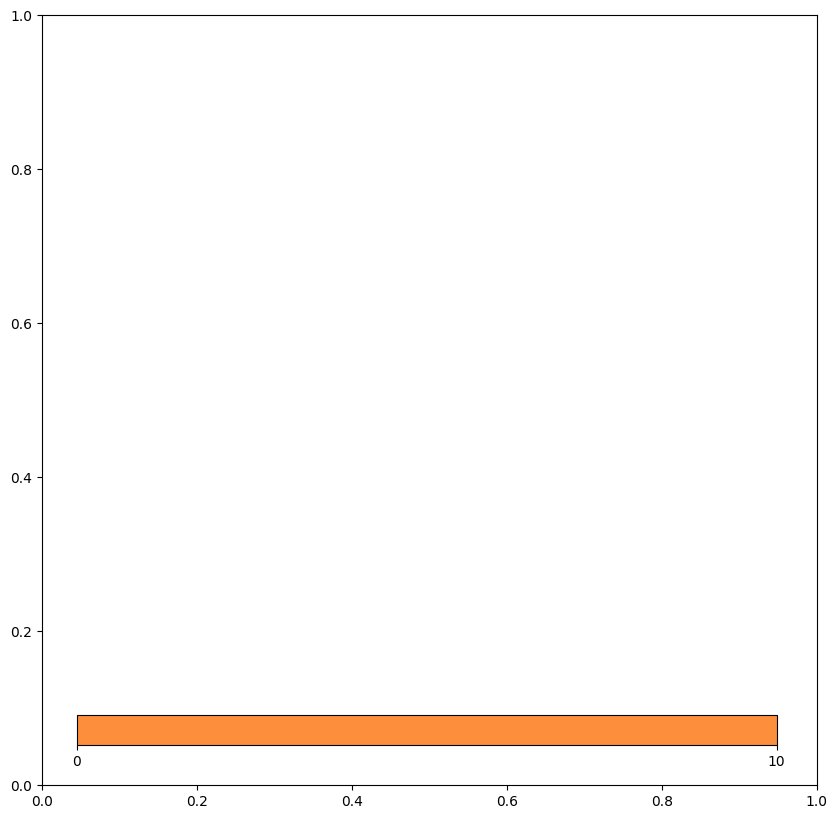

In [115]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import matplotlib as mpl

fig, ax = plt.subplots(figsize=(10, 10))

param = 'pop_within_1km_shoreline'
steps = np.ceil((countries_summary[param].max()/10)/10)*10
vmin, vmax = 0, np.ceil(countries_summary[param].max()/steps)*steps+steps
cax = fig.add_axes([0.16, 0.15, 0.70, 0.03])

# Define colour map
cmap = mpl.cm.YlOrRd
bounds = list(np.arange(vmin,vmax,steps))
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)#, extend='both')
cbar = mpl.colorbar.ColorbarBase(cax, cmap=cmap,
                                norm=norm,
                                orientation='horizontal')
countries_summary.plot(param, ax=ax, cmap=cmap, norm=norm);

handles=[]
labels=[]
for _, style in df_styles.iterrows():
    subset = gdf[(gdf['rate_time'] >= style['lower']) & (gdf['rate_time'] < style['upper'])]
    subset.plot(ax=ax, color=style['color'], label=style['label'], markersize=10)
    # Append legend entry based on 'label' from df_styles_sorted
    handles.append(Patch(facecolor=style['color'], edgecolor=style['color']))
    labels.append(style['label'])
    #print(style['label'])

# Get the ordered index that matches style['label'] to the labels list
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
#ordered_indices = pd.Index(labels).get_indexer(pd.Index(df_styles['label']))
#by_label = dict(zip(list(np.array(labels)[ordered_indices]), list(np.array(handles)[ordered_indices])))
ax.legend(by_label.values(), by_label.keys(), title="Shoreline Change Rate")

plt.axis("off")
plt.tight_layout()